<a id='top'>Top reference</a>
<h1 style="text-align:center">
<img src="https://files.aredacao.com.br/upload/content/doencas-cardiacas-merecem-atencao-em-meio-a-pandemia.jpg" style="width:900px;height:400px;">

### Notas de lançamento

- Versão 1: Verificação dos dados e distribuição dos dados.
- Versão 2: Seleção sobre as melhores variáveis.
- Versão 3: Ajuste sobre as escalas.
- Versão 4: Divisão dados de treino/teste e cross validation.
- Versão 5: Treinamento de diversos modelos de machine learning.
- Versão 6: Calculo das métricas de treino e de teste.


## Conteúdo

1. [Introdução](#1)
 1. [Módulos](#1.1)
2. [Ajustando dados para os modelos de Machine Learning](#2)
 1. [Escala](#2.1)
3. [Featute Selection](#3)
 1. [Seleção Univariada](#3.1)
 2. [Eliminação Recursiva de Atributos](#3.2)
 3. [Método Ensemble](#3.3)
4. [Divisão dos dados](#4)
5. [Avaliando a Performance](#5)
 1. [Curva ROC](#5.1)
 2. [Acurácia](#5.2)
 3. [Precisão](#5.3)
 4. [Recall](#5.3)
6. [Modelos de Machine Learning](#6)
 1. [Logistic Regression](#6.1)
 2. [Decision Tree Classifier](#6.2)
 3. [Kneighbors Classifier](#6.3)
 4. [Linear Discriminant Analysis](#6.4)
 5. [Gaussian NB](#6.5)
 6. [Suport Vector Machine](#6.6)
7. [Otimização de Performance com Métodos Ensemble](#7)
 1. [Bagged Decision Trees](#7.1)
 2. [Random Forest](#7.2)
 3. [AdaBoost](#7.3)
 4. [Gradient Boosting](#7.4) 
 4. [Voting Ensemble](#7.5)
 5. [XGboost](#7.6)
8. [Conclusão](#8)

<a id="1"></a> <br>
# <div class="alert alert-block alert-info">1 - Introducão</div>

**As Doenças Cardiovasculares (DCV) são, atualmente, a maior causa de mortes no mundo. Elas foram responsáveis
por mais de 17 milhões de óbitos em 2008, dos quais três milhões ocorreram antes dos 60 anos de idade, e grande
parte poderia ter sido evitada. A Organização Mundial de Saúde estima que em 2030 quase 23,6 milhões de
pessoas morrerão de doenças cardiovasculares.**

**O ônus econômico das doenças cardiovasculares cresceu exponencialmente nas últimas décadas. Em 2000, as doenças
cardiovasculares foram responsáveis pela principal alocação de recursos públicos em hospitalizações no Brasil e
foram a terceira causa de permanência hospitalar prolongada. Entre 1991 e 2000, os custos hospitalares atribuídos 
às doenças cardiovasculares aumentaram cerca de 176%**

<a id="1.1"></a> <br>
# <div class="alert alert-warning">1.1 - Módulos</div>

In [1]:
#Manipulação dos dados e visualização
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import time

#Normalização dos dados
from sklearn.preprocessing import MinMaxScaler

#Seleção de variáveis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

#Divisão de dados
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Métricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

#Otimização Performance com Métodos Ensemble
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

1. **age:** Idade
1. **sex:** Sexo
1. **cp:** Tipo de dor no peito (4 valores)
1. **trestbps:** Pressão sanguínea em repouso
1. **chol:** Colesterol sérico em mg / dl
1. **fbs:** Açúcar no sangue em jejum> 120 mg / dl
1. **restecg:** Resultados eletrocardiográficos de repouso (valores 0,1,2)
1. **thalach:** Frequência cardíaca máxima alcançada
1. **exang:** Angina induzida por exercício
1. **oldpeak:** Depressão de ST induzida por exercício em relação ao repouso
1. **slope:** A inclinação do segmento ST de pico do exercício
1. **ca:** Número de vasos principais (0-3) coloridos por fluorosopia
1. **thal:** 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
1. **target:** Indica a presença ou ausência de doença cardíaca. (= o atributo previsto)

In [4]:
#Tamanho do df
df.shape

(303, 14)

In [5]:
#Verificar se existe valores NaN
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Tipos de dados que iremos trabalhar
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#Verificar a distribuição entre casos confirmados e não confirmados, o ideal seria uma distribuição de 50%.

(df['target'].value_counts()/df.shape[0])*100

1    54.455446
0    45.544554
Name: target, dtype: float64

In [8]:
#Skew se refere a distribuição dos dados que é assumida ser normal ou gaussiana. 
#Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal.

df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

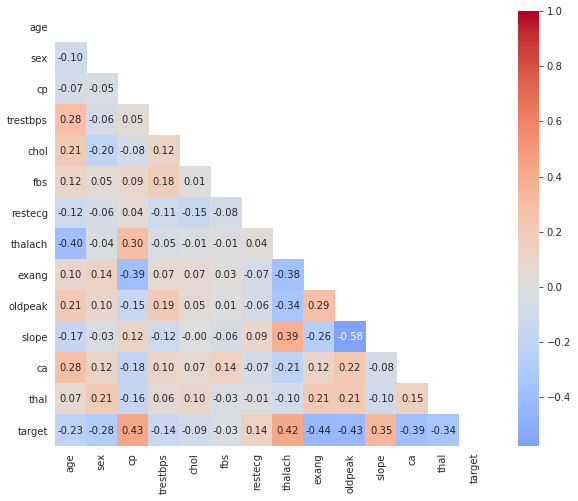

In [9]:
correlacao = df.corr()
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(correlacao,center=0,cmap="coolwarm",mask=mask,annot=True, square=True, fmt='.2f')

<a id="2"></a> <br>
# <div class="alert alert-block alert-info">2 - Ajustando dados para os modelos de Machine Learning</div>

**Muitos algoritmos esperam receber os dados em um formato específico. Portanto, é necessário entregar os dados
com uma estrutura que seja adequada ao algoritmo que será utilizado**

<a id="2.1"></a> <br>
# <div class="alert alert-warning">2.1 - Escala</div>

**A escala é uma das primeiras tarefas dentro do pré-processamento, que consiste em deixar os dados na mesma escala.
Muitos algoritmos de machine learning vão se beneficiar disso e produzir resultados melhores.**

**Na etapa abaixo é chamado de normalização e significa colocar os dados em uma escala com range entre 0 e 1.
Isso é útil para otimização, sendo usado nos algoritmos de Machine Learning, como gradient descent.**

In [10]:
#Normalização sobre as escalas de valores

df_X = df.drop(columns=["target"])
df_Y = df["target"]


X = df_X.values
Y = df_Y.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(X)

<a id="3"></a> <br>
# <div class="alert alert-block alert-info">3 - Featute Selection</div>

**Os atributos presentes no dataset, terão grande influência na precisão e no modelo predito.**
- Atributos irrelevantes terão impacto negativo na performance.
- Atributos colineares podem afetar na acurácia do modelo.

**Nesta etapa é onde selecionamos os atributos (variáveis) que serão melhores candidatas a variáveis preditoras.
Ajudando a reduzir o overfitting, aumentando a acurácia do modelo e reduzindo o tempo de treinamento.**

<a id="3.1"></a> <br>
# <div class="alert alert-warning">3.1 - Seleção Univariada</div>

**Testes estatísticos podem ser usados para selecionar os atributos que possuem forte
relacionamento com a variável que queremos prever.
Foi utilizado a função SelectKBest() que pode ser utilizada em diversos testes estatísticos,
para selecionar os atributos.**

**Foi utilizado o tese do Qui-Quadrado**

**O teste de independência Qui-Quadrado é usado para descobrir se existe uma associação entre 
a variável de linha e coluna variável em uma tabela de contingência construído à partir dos dados.**

In [11]:
#Extraçao de variáveis
testagem = SelectKBest(score_func=chi2,k=7)
fit = testagem.fit(rescaledx,Y)

#Sumarização do score
score = fit.scores_
colunas = df_X.columns

new_df = pd.DataFrame()
new_df["Colunas"] = colunas
new_df["Score chi2"] = score


<a id="3.2"></a> <br>
# <div class="alert alert-warning">3.2 - Eliminação Recursiva de Atributos</div>

**Esta é outra técnica para seleção de atributos, que recursivamente remove os atributos
e constroí o modelo com os atributos remanescentes.
Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais
contribuem para prever a variável alvo.**

In [12]:
#Criando o modelo
modelo = LogisticRegression(max_iter=1000)

#Recursive Feature Elimination (RFE)
rfe = RFE(modelo, n_features_to_select=1)
fit = rfe.fit(rescaledx,Y)

#Resultados
new_df["ranking RFE"] = fit.ranking_

<a id="3.3"></a> <br>
# <div class="alert alert-warning">3.3 - Método Enseable para seleção de variáveis</div>

**Bagged Decision Trees, como o algoritmo Random Forest, podem ser usados para estimar
a importância de cada atributo.
Esse método retorna um score para cada atributo, quanto maior, maior a importância de
cada atributo**

In [13]:
#Criando o modelo
modelo = ExtraTreesClassifier()
modelo.fit(rescaledx,Y)

new_df["Enseable"] = modelo.feature_importances_

In [14]:
#Melhores variáveis 
print(new_df)


#Variáveis qui-quadrado(Chi2)
colunas_chi2 = ["exang","cp","ca","oldpeak","sex","slope","thal"]

#Variáveis RFE
colunas_rfe = ["oldpeak","thalach","ca","thal","cp","slope","sex"]

#Variáveis Enseable
colunas_enseable = ["ca","cp","exang","thal","thalach","oldpeak","age"]

     Colunas  Score chi2  ranking RFE  Enseable
0        age    1.039771           10  0.074284
1        sex    7.576835            7  0.058322
2         cp   20.866033            5  0.131705
3   trestbps    0.489248            8  0.060799
4       chol    0.111905           12  0.059278
5        fbs    0.202934           13  0.021268
6    restecg    1.489135           11  0.032420
7    thalach    2.735347            2  0.084043
8      exang   38.914377            9  0.095686
9    oldpeak   11.716815            1  0.093937
10     slope    4.902048            6  0.066662
11        ca   16.610191            3  0.124190
12      thal    1.930618            4  0.097406


<h3 style="text-align:center;font-size:200%;;">Conclusão do projeto</h3>
<div class="progress">
  <div class="progress-bar" role="progressbar" style="width: 35%;" aria-valuenow="25" aria-valuemin="0" aria-valuemax="100">35% Concluído</div>
</div>

<a id="4"></a> <br>
# <div class="alert alert-block alert-info">4 - Divisão dos dados</div>

**Foi utilizado a função train_test_split() para dividir os dados de treino e de teste.
Foi realizado um split de 75% para dados de treino e 25% para dados de teste.**

**Por fim utilizamos o Cross Validation sobre os dados de treino em cada modelo.**

**Cross validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo
com menos vaariância que a técnica de dividir os dados de treino/teste.**


**Com está técnica dividmos os dados em partes normalmente chamadas em k-folds.
Ele executa cada fold por vez até k-1 fold, por fim, podemos sumarizar a performance
de cada fold usando a média e o desvio padrão**

<h1 style="text-align:center">
<img src="https://miro.medium.com/max/500/1*0_jdEVi6l1Nj-DKK8wJTTQ.png">

<a id="5"></a> <br>
# <div class="alert alert-block alert-info">5 - Avaliando a Performance </div>


**As métricas que são escolhidas para avaliar a performance do modelo vão influenciar
a forma como a performance é medida e comparada com modelos criados com outros algoritmos.**

<a id="5.1"></a> <br>
# <div class="alert alert-warning">5.1 - Curva ROC</div>

**A curva ROC permite analisar a métrica AUC (Area Unde the Curve).**

**A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). 
Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.**

**O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.
Quanto maior o AUC, melhor.**

<h1 style="text-align:center">
<img src="https://miro.medium.com/max/2400/1*RqK5DjVxcj4qZsCdN4FOSQ.png">

<a id="5.2"></a> <br>
# <div class="alert alert-warning">5.2 - Acurácia</div>


**Esta é a métrica mais simples. É basicamente o número de acertos (positivos) divido pelo número total de exemplos. Ela deve ser usada em datasets com a mesma proporção de exemplos para cada classe, e quando as penalidades de acerto e erro para cada classe forem as mesmas.**

**Em problemas com classes desproporcionais, ela causa uma falsa impressão de bom desempenho. Por exemplo, num dataset em que 80% dos exemplos pertençam a uma classe, só de classificar todos os exemplos naquela classe já se atinge uma precisão de 80%, mesmo que todos os exemplos da outra classe estejam classificados incorretamente.**

<a id="5.3"></a> <br>
# <div class="alert alert-warning">5.3 - Precisão</div>

**A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo.**

**Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.**

<a id="5.4"></a> <br>
# <div class="alert alert-warning">5.4 - Recall</div>

**O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos.**

**Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.**

<a id="6"></a> <br>
# <div class="alert alert-block alert-info">6 - Modelos de Machine Learning</div>

In [15]:
#DataFrame para verificaçao de todos os modelos

df_modelos = pd.DataFrame(columns=["Modelo","Categoria","Tempo (s)","Train AUC ROC","Train ACURÁCIA","Train PRECISÃO","Train RECALL",
                                             "Test AUC ROC","Test ACURÁCIA","Test PRECISÃO","Test RECALL"])

<a id="6.1"></a> <br>
# <div class="alert alert-warning">6.1 - Logistic Regression</div>

**A Regressão Logística é uma análise que nos permite estimar a probabilidade associada à ocorrência de determinado evento em face de um conjunto de variáveis explanatórias.**

**As vantagens desse tipo de regressão incluem:**
- Facilidade para lidar com variáveis independentes categóricas;
- Fornece resultados em termos de probabilidade;
- Facilidade de classificação de indivíduos em categorias;
- Requer pequeno número de suposições;
- Possui alto grau de confiabilidade.

<h1 style="text-align:center">
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png" style="width:900px;height:400px;">

<a id="6.2"></a> <br>
# <div class="alert alert-warning">6.2 - Linear Discriminant Analysis</div>

**O objetivo da análise discriminante é desenvolver funções discriminantes que nada mais são do que a combinação linear de variáveis ​​independentes que discriminarão entre as categorias da variável dependente de maneira perfeita.**

**Deseja-se que as amostras tenham a maior distância entre classes e a menor distância dentro da classe, ou seja, maximização da separação entre duas ou mais classes**

<a id="6.3"></a> <br>
# <div class="alert alert-warning">6.3 - Gaussian NB</div>

**O algoritmo Naïve Bayes é um algoritmo de aprendizagem supervisionada, baseado no teorema de Bayes e utilizado para resolver problemas de classificação.**

**O Naïve Bayes Classifier é um dos algoritmos de classificação mais simples e eficazes que ajuda na construção de modelos de aprendizado de máquina rápidos que podem fazer previsões rápidas.**

**É um classificador probabilístico, o que significa que prevê com base na probabilidade de um objeto .**

<a id="6.4"></a> <br>
# <div class="alert alert-warning">6.4 - KNeighbors Classifier</div>

**Em estatística , o algoritmo k-nearest neighbors ( k-NN ) é um método não paramétrico proposto por Thomas Cover usado para classificação e regressão .**

**k-NN é um tipo de aprendizagem baseada em instância , ou aprendizagem preguiçosa , onde a função é aproximada apenas localmente e todos os cálculos são adiados até a avaliação da função. Como esse algoritmo depende da distância para classificação, normalizar os dados de treinamento pode melhorar drasticamente sua precisão.**

**Tanto para classificação quanto para regressão, uma técnica útil pode ser atribuir pesos às contribuições dos vizinhos, de modo que os vizinhos mais próximos contribuam mais para a média do que os mais distantes.**

<h1 style="text-align:center">
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png" style="width:900px;height:400px;">

<a id="6.5"></a> <br>
# <div class="alert alert-warning">6.5 - Decision Tree Classifier</div>


**Uma árvore de decisão
toma como entrada um objeto ou situação descrito por um
conjunto de atributos e retorna uma decisão - o valor de
saída previsto, de acordo com a entrada**

**A árvore de classificação é o resultado de se fazer uma
sequência ordenada de perguntas, e as perguntas feitas a cada
passo na sequência dependem das respostas às perguntas
anteriores. A sequência termina em uma previsão da classe.**

<h1 style="text-align:center">
<img src="https://i.ytimg.com/vi/CcQMS_eaBWE/maxresdefault.jpg" style="width:600px;height:250px;">

<a id="6.6"></a> <br>
# <div class="alert alert-warning">6.6 - Suport Vector Machine</div>


**As Máquinas de Vetor Suporte destacam-se pela forte fundamentação teórica
existente, possuindo como base a teoria da aprendizagem estatística, sendo esta característica
um diferencial sobre outras técnicas como redes neurais, que não possui um modelo teórico.**

**A capacidade em trabalhar com padrões de alta dimensionalidade é outra
caracteréstica interessante desta técnica, sendo ideal para aplicação em problemas de visão
computacional, como reconhecimento de padrões e filtragem**


In [16]:
#Seleceçao de modelos

def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25,random_state=seed)  
    
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    
    #Preparando o modelo
    modelos = []
    modelos.append(("LR",LogisticRegression(max_iter=400)))
    modelos.append(("LDA",LinearDiscriminantAnalysis()))
    modelos.append(("NB",GaussianNB()))
    modelos.append(("KNN",KNeighborsClassifier()))
    modelos.append(("CART",DecisionTreeClassifier()))
    modelos.append(("SVM",SVC()))
       
    for nome,modelo in modelos:
        
        kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
        
        inicio =time.time()
        cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
        cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
        cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
        cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")
        
        
        modelo_test = modelo.fit(rescaledx,Y)
        
        #Normalização
        
        scaler = MinMaxScaler(feature_range=(0,1))
        rescaledx_test = scaler.fit_transform(X_test)
        
        y_pred = modelo_test.predict(rescaledx_test)

        cv_acc_test = accuracy_score(y_test,y_pred)
        cv_roc_test = roc_auc_score(y_test,y_pred)
        cv_prec_test = precision_score(y_test,y_pred)
        cv_recall_test = recall_score(y_test,y_pred)
        
        fim = time.time()

        
                
        msg = "Modelo: %s, AUC ROC: %.2f%% (%.2f%%) Acurácia: %.2f%% (%.2f%%) Precisão: %.2f%% (%.2f%%) Recall: %.2f%% (%.2f%%) " %(nome,cv_roc.mean()*100,cv_roc.std()*100,
                                                                          cv_acc.mean()*100,cv_acc.std()*100,
                                                                          cv_prec.mean()*100,cv_prec.std()*100,
                                                                          cv_recall.mean()*100,cv_recall.std()*100)
        tempo = fim - inicio
        print(msg)
        df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,cv_roc.mean()*100,cv_acc.mean()*100,cv_prec.mean()*100,cv_recall.mean()*100,
                                                cv_acc_test.mean()*100,cv_roc_test.mean()*100,cv_prec_test.mean()*100,cv_recall_test.mean()*100]
       
              
        
print("Modelo CHI2")
selecao_modelos(df,colunas_chi2,"target",df_modelo = df_modelos,variavel="CHI2")

print("\n")
print("Modelo RFE")
selecao_modelos(df,colunas_rfe,"target",df_modelo = df_modelos,variavel="RFE")

print("\n")
print("Modelo ENSEABLE")
selecao_modelos(df,colunas_enseable,"target",df_modelo = df_modelos,variavel="ENSEABLE")

Modelo CHI2
Modelo: LR, AUC ROC: 91.48% (3.14%) Acurácia: 85.00% (3.88%) Precisão: 85.32% (3.84%) Recall: 89.02% (6.26%) 
Modelo: LDA, AUC ROC: 91.36% (3.08%) Acurácia: 85.00% (4.78%) Precisão: 84.26% (4.13%) Recall: 90.58% (7.23%) 
Modelo: NB, AUC ROC: 90.33% (2.92%) Acurácia: 85.45% (4.15%) Precisão: 87.37% (5.10%) Recall: 87.45% (8.34%) 
Modelo: KNN, AUC ROC: 89.03% (2.82%) Acurácia: 83.71% (4.07%) Precisão: 84.45% (4.08%) Recall: 87.54% (5.59%) 
Modelo: CART, AUC ROC: 77.84% (2.78%) Acurácia: 79.29% (2.25%) Precisão: 79.58% (3.68%) Recall: 81.20% (6.99%) 
Modelo: SVM, AUC ROC: 92.18% (2.92%) Acurácia: 85.44% (5.04%) Precisão: 84.37% (4.44%) Recall: 91.38% (6.66%) 


Modelo RFE
Modelo: LR, AUC ROC: 91.84% (3.38%) Acurácia: 85.47% (2.98%) Precisão: 84.86% (3.60%) Recall: 90.58% (3.29%) 
Modelo: LDA, AUC ROC: 92.09% (3.07%) Acurácia: 86.36% (3.75%) Precisão: 84.93% (5.87%) Recall: 92.92% (3.04%) 
Modelo: NB, AUC ROC: 90.82% (4.06%) Acurácia: 85.47% (4.10%) Precisão: 85.94% (6.20%) Rec

<h3 style="text-align:center;font-size:200%;;">Conclusão do projeto</h3>
<div class="progress">
  <div class="progress-bar" role="progressbar" style="width: 75%;" aria-valuenow="25" aria-valuemin="0" aria-valuemax="100">75% Concluído</div>
</div>

<a id="7"></a> <br>
# <div class="alert alert-block alert-info">7 - Otimização de Performance com Métodos Ensemble</div>

**Métodos Ensemble permitem aumentar consideralvemente o nível de precisão nas suas previsões. Foi criado métodos Ensemble mais poderosos:**

**Bagging: Para consutrução de múltiplos modelos a partir de diferentes subset no dataset de treino**

**Boosting: Para construção de múltiplos modelos, onde cada modelo aprende a corrigir os erros gerados pelo modelo anterior.**

**Voting: Para construção de múltiplos modelos (normalmente de tipos diferentes) e estatística simples são usadas para combinar as previsões.**

<a id="7.1"></a> <br>
# <div class="alert alert-warning">7.1 - Bagged Decision Trees</div>

**Este método funciona bem quando existe alta variância nos dados**

In [17]:
# Bagged Decision Trees


def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25,random_state=seed)  
    
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    #Preparando o modelo
    modelos = []
    modelos.append(("BDT LR",LogisticRegression(max_iter=400)))
    modelos.append(("BDT LDA",LinearDiscriminantAnalysis()))
    modelos.append(("BDT NB",GaussianNB()))
    modelos.append(("BDT KNN",KNeighborsClassifier()))
    modelos.append(("BDT CART",DecisionTreeClassifier()))
    modelos.append(("BDT SVM",SVC()))
    
    
    for nome,modelo in modelos:
        kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
        
        inicio =time.time()
        modelo_bagging = BaggingClassifier(base_estimator=modelo,
                                          n_estimators = 100,random_state = seed)

        cv_roc = cross_val_score(modelo_bagging,rescaledx,Y,cv = kfold,scoring="roc_auc")
        cv_acc = cross_val_score(modelo_bagging,rescaledx,Y,cv = kfold,scoring="accuracy")
        cv_prec = cross_val_score(modelo_bagging,rescaledx,Y,cv = kfold,scoring="precision")
        cv_recall = cross_val_score(modelo_bagging,rescaledx,Y,cv = kfold,scoring="recall")

        
        
        modelo_test = modelo_bagging.fit(rescaledx,Y)
        
        #Normalização
        
        scaler = MinMaxScaler(feature_range=(0,1))
        rescaledx_test = scaler.fit_transform(X_test)
        
        y_pred = modelo_test.predict(rescaledx_test)

        cv_acc_test = accuracy_score(y_test,y_pred)
        cv_roc_test = roc_auc_score(y_test,y_pred)
        cv_prec_test = precision_score(y_test,y_pred)
        cv_recall_test = recall_score(y_test,y_pred)

        
        fim = time.time()
        
                
        msg = "Modelo: %s, AUC ROC: %.2f%% (%.2f%%) Acurácia: %.2f%% (%.2f%%) Precisão: %.2f%% (%.2f%%) Recall: %.2f%% (%.2f%%) " %(nome,cv_roc.mean()*100,cv_roc.std()*100,
                                                                          cv_acc.mean()*100,cv_acc.std()*100,
                                                                          cv_prec.mean()*100,cv_prec.std()*100,
                                                                          cv_recall.mean()*100,cv_recall.std()*100)
        tempo = fim - inicio
        print(msg)
        df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,cv_roc.mean()*100,cv_acc.mean()*100,cv_prec.mean()*100,cv_recall.mean()*100,
                                                cv_acc_test.mean()*100,cv_roc_test.mean()*100,cv_prec_test.mean()*100,cv_recall_test.mean()*100]

print("Modelo CHI2")
selecao_modelos(df,colunas_chi2,"target",df_modelo = df_modelos,variavel="CHI2")
print("\n")
print("Modelo RFE")
selecao_modelos(df,colunas_rfe,"target",df_modelo = df_modelos,variavel="RFE")
print("\n")
print("Modelo ENSEABLE")
selecao_modelos(df,colunas_enseable,"target",df_modelo = df_modelos,variavel="ENSEABLE")

Modelo CHI2
Modelo: BDT LR, AUC ROC: 91.52% (3.22%) Acurácia: 85.00% (3.88%) Precisão: 85.32% (3.84%) Recall: 89.02% (6.26%) 
Modelo: BDT LDA, AUC ROC: 91.28% (3.01%) Acurácia: 84.57% (3.76%) Precisão: 84.78% (4.25%) Recall: 89.02% (6.26%) 
Modelo: BDT NB, AUC ROC: 91.02% (2.65%) Acurácia: 85.45% (4.15%) Precisão: 87.37% (5.10%) Recall: 87.45% (8.34%) 
Modelo: BDT KNN, AUC ROC: 90.13% (3.16%) Acurácia: 83.72% (4.00%) Precisão: 84.65% (4.94%) Recall: 87.54% (5.59%) 
Modelo: BDT CART, AUC ROC: 90.64% (0.95%) Acurácia: 82.83% (1.51%) Precisão: 83.62% (2.76%) Recall: 86.71% (3.13%) 
Modelo: BDT SVM, AUC ROC: 92.11% (2.54%) Acurácia: 86.33% (4.57%) Precisão: 86.26% (4.53%) Recall: 90.58% (7.23%) 


Modelo RFE
Modelo: BDT LR, AUC ROC: 91.76% (3.33%) Acurácia: 86.36% (3.76%) Precisão: 85.74% (5.07%) Recall: 91.35% (3.98%) 
Modelo: BDT LDA, AUC ROC: 92.09% (3.15%) Acurácia: 86.79% (3.40%) Precisão: 85.44% (5.35%) Recall: 92.92% (3.04%) 
Modelo: BDT NB, AUC ROC: 90.95% (3.94%) Acurácia: 86.35% 

<a id="7.2"></a> <br>
# <div class="alert alert-warning">7.2 - Random Forest</div>

**Random Forest é uma extensão do Bagging Decision Tree. Amostras do dataset de treino são usadas com reposição, mas as árvoes são criadas de uma forma que reduz a correlação entre classificadores individuais.**

In [18]:
# Random Forest


def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25,random_state=seed)  
    
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    nome = "Random Forest"
    
    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    inicio =time.time()
        
    modelo= RandomForestClassifier(n_estimators = 100,max_features = 3)
        
    cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")

        
    
    modelo_test = modelo.fit(rescaledx,Y)
    
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)
        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_roc_test = roc_auc_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)

    fim = time.time()    
                
    msg = "Modelo: %s, AUC ROC: %.2f%% (%.2f%%) Acurácia: %.2f%% (%.2f%%) Precisão: %.2f%% (%.2f%%) Recall: %.2f%% (%.2f%%) " %(nome,cv_roc.mean()*100,cv_roc.std()*100,
                                                                          cv_acc.mean()*100,cv_acc.std()*100,
                                                                          cv_prec.mean()*100,cv_prec.std()*100,
                                                                          cv_recall.mean()*100,cv_recall.std()*100)
    tempo = fim - inicio
    print(msg)
    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,cv_roc.mean()*100,cv_acc.mean()*100,cv_prec.mean()*100,cv_recall.mean()*100,
                                                cv_acc_test.mean()*100,cv_roc_test.mean()*100,cv_prec_test.mean()*100,cv_recall_test.mean()*100]

print("Modelo CHI2")
selecao_modelos(df,colunas_chi2,"target",df_modelo = df_modelos,variavel="CHI2")
print("\n")
print("Modelo RFE")
selecao_modelos(df,colunas_rfe,"target",df_modelo = df_modelos,variavel="RFE")
print("\n")
print("Modelo ENSEABLE")
selecao_modelos(df,colunas_enseable,"target",df_modelo = df_modelos,variavel="ENSEABLE")

Modelo CHI2
Modelo: Random Forest, AUC ROC: 91.66% (1.05%) Acurácia: 83.27% (0.97%) Precisão: 84.45% (3.07%) Recall: 87.48% (3.00%) 


Modelo RFE
Modelo: Random Forest, AUC ROC: 92.57% (3.60%) Acurácia: 86.81% (4.56%) Precisão: 87.27% (6.49%) Recall: 90.58% (4.10%) 


Modelo ENSEABLE
Modelo: Random Forest, AUC ROC: 91.76% (3.58%) Acurácia: 88.11% (3.60%) Precisão: 87.47% (5.65%) Recall: 90.62% (1.96%) 


<a id="7.3"></a> <br>
# <div class="alert alert-warning">7.3 - AdaBoost</div>

**Algoritmo baseado em Boosting Ensemble criam uma sequência de modelos que tentam corrigir os erros dos modelos anteriores dentro da sequência. Uma vez criados, os modelos fazem previsões que podem receber um peso de acordo com sua acurácia e os resultados são combinados para criar uma previsão única final.**

**O AdaBoost atribui pesos às instâncias no dataset, definindo quão fácil ou difícil elas são para o precesso de classificação, permitindo que o algoritmo tenham mais ou menos atenção às instâncias durante o processo de construção dos modelos.**

In [19]:
# AdaBoost

def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25,random_state=seed)  
    
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    nome = "AdaBoost"

    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    inicio =time.time()
        
    modelo= AdaBoostClassifier(n_estimators = 30,random_state=seed)
    
    cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")

        
    
    modelo_test = modelo.fit(rescaledx,Y)
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)
        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_roc_test = roc_auc_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)

        
    fim = time.time()
    
    msg = "Modelo: %s, AUC ROC: %.2f%% (%.2f%%) Acurácia: %.2f%% (%.2f%%) Precisão: %.2f%% (%.2f%%) Recall: %.2f%% (%.2f%%) " %(nome,cv_roc.mean()*100,cv_roc.std()*100,
                                                                          cv_acc.mean()*100,cv_acc.std()*100,
                                                                          cv_prec.mean()*100,cv_prec.std()*100,
                                                                          cv_recall.mean()*100,cv_recall.std()*100)
    tempo = fim - inicio
    print(msg)
    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,cv_roc.mean()*100,cv_acc.mean()*100,cv_prec.mean()*100,cv_recall.mean()*100,
                                                cv_acc_test.mean()*100,cv_roc_test.mean()*100,cv_prec_test.mean()*100,cv_recall_test.mean()*100]

print("Modelo CHI2")
selecao_modelos(df,colunas_chi2,"target",df_modelo = df_modelos,variavel="CHI2")
print("\n")
print("Modelo RFE")
selecao_modelos(df,colunas_rfe,"target",df_modelo = df_modelos,variavel="RFE")
print("\n")
print("Modelo ENSEABLE")
selecao_modelos(df,colunas_enseable,"target",df_modelo = df_modelos,variavel="ENSEABLE")

Modelo CHI2
Modelo: AdaBoost, AUC ROC: 91.16% (3.32%) Acurácia: 87.24% (3.21%) Precisão: 88.51% (6.54%) Recall: 89.78% (3.34%) 


Modelo RFE
Modelo: AdaBoost, AUC ROC: 90.27% (2.92%) Acurácia: 86.79% (1.30%) Precisão: 87.33% (2.90%) Recall: 89.78% (3.34%) 


Modelo ENSEABLE
Modelo: AdaBoost, AUC ROC: 89.15% (6.61%) Acurácia: 84.59% (2.37%) Precisão: 86.41% (4.14%) Recall: 86.68% (3.34%) 


<a id="7.4"></a> <br>
# <div class="alert alert-warning">7.4 - Gradiente Boosting</div>

**Também chamado de Stochastic Gradient Boosting, é um dos métodos Ensemble mais sofisticados**

In [20]:
# Gradiente Boosting


def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados

    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25,random_state=seed)  
    
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    nome = "Gradiente Boosting"

    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    inicio =time.time()
        
    modelo= GradientBoostingClassifier(n_estimators = 30,random_state=seed)

    cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")

        
    
    modelo_test = modelo.fit(rescaledx,Y)
    
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)
        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_roc_test = roc_auc_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)

    fim = time.time()
                
    msg = "Modelo: %s, AUC ROC: %.2f%% (%.2f%%) Acurácia: %.2f%% (%.2f%%) Precisão: %.2f%% (%.2f%%) Recall: %.2f%% (%.2f%%) " %(nome,cv_roc.mean()*100,cv_roc.std()*100,
                                                                          cv_acc.mean()*100,cv_acc.std()*100,
                                                                          cv_prec.mean()*100,cv_prec.std()*100,
                                                                          cv_recall.mean()*100,cv_recall.std()*100)
    tempo = fim - inicio
    print(msg)
    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,cv_roc.mean()*100,cv_acc.mean()*100,cv_prec.mean()*100,cv_recall.mean()*100,
                                                cv_acc_test.mean()*100,cv_roc_test.mean()*100,cv_prec_test.mean()*100,cv_recall_test.mean()*100]

print("Modelo CHI2")
selecao_modelos(df,colunas_chi2,"target",df_modelo = df_modelos,variavel="CHI2")
print("\n")
print("Modelo RFE")
selecao_modelos(df,colunas_rfe,"target",df_modelo = df_modelos,variavel="RFE")
print("\n")
print("Modelo ENSEABLE")
selecao_modelos(df,colunas_enseable,"target",df_modelo = df_modelos,variavel="ENSEABLE")

Modelo CHI2
Modelo: Gradiente Boosting, AUC ROC: 92.66% (2.06%) Acurácia: 85.92% (2.90%) Precisão: 84.95% (3.30%) Recall: 91.42% (3.81%) 


Modelo RFE
Modelo: Gradiente Boosting, AUC ROC: 91.80% (3.47%) Acurácia: 86.81% (3.85%) Precisão: 85.75% (4.20%) Recall: 92.15% (4.41%) 


Modelo ENSEABLE
Modelo: Gradiente Boosting, AUC ROC: 91.49% (4.07%) Acurácia: 84.14% (4.93%) Precisão: 83.78% (3.05%) Recall: 89.11% (6.25%) 


<a id="7.5"></a> <br>
# <div class="alert alert-warning">7.5 - Voting Ensenble</div>

**Este é um dos métodos Ensemble mais simples. Este método cria dois ou mais modelos separados a partir do dataset de treino. O classificados Voting então utiliza a média das previsões em novos conjuntos de dados.**

**As previsões de cada sub-modelo podem receber pesos, atráves de heurística.**

In [21]:
#Voting Ensenble


def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25,random_state=seed)  
    
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    #Preparando o modelo
    modelos = []
    modelos.append(("LR",LogisticRegression(max_iter=400)))
    modelos.append(("LDA",LinearDiscriminantAnalysis()))
    modelos.append(("NB",GaussianNB()))
    modelos.append(("KNN",KNeighborsClassifier()))
    modelos.append(("CART",DecisionTreeClassifier()))
    modelos.append(("SVN",SVC()))
    
    #Criando o modelo ensemble
    inicio =time.time()
    ensemble = VotingClassifier(modelos)
    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")

        
    
    modelo_test = modelo.fit(rescaledx,Y)
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)
        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)

    
    nome = "Voting Ensenble"
    fim = time.time()
                
    msg = "Modelo: %s, Acurácia: %.2f%% (%.2f%%) Precisão: %.2f%% (%.2f%%) Recall: %.2f%% (%.2f%%) " %(nome,
                                                                          cv_acc.mean()*100,cv_acc.std()*100,
                                                                          cv_prec.mean()*100,cv_prec.std()*100,
                                                                          cv_recall.mean()*100,cv_recall.std()*100)
    tempo = fim - inicio
    print(msg)
    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,None,cv_acc.mean()*100,cv_prec.mean()*100,cv_recall.mean()*100,
                                                None,cv_acc_test.mean()*100,cv_prec_test.mean()*100,cv_recall_test.mean()*100]

print("Modelo CHI2")
selecao_modelos(df,colunas_chi2,"target",df_modelo = df_modelos,variavel="CHI2")
print("\n")
print("Modelo RFE")
selecao_modelos(df,colunas_rfe,"target",df_modelo = df_modelos,variavel="RFE")
print("\n")
print("Modelo ENSEABLE")
selecao_modelos(df,colunas_enseable,"target",df_modelo = df_modelos,variavel="ENSEABLE")

Modelo CHI2
Modelo: Voting Ensenble, Acurácia: 84.13% (2.27%) Precisão: 84.41% (1.90%) Recall: 85.88% (4.19%) 


Modelo RFE
Modelo: Voting Ensenble, Acurácia: 83.74% (5.71%) Precisão: 85.71% (5.55%) Recall: 88.25% (2.63%) 


Modelo ENSEABLE
Modelo: Voting Ensenble, Acurácia: 85.00% (4.38%) Precisão: 86.02% (5.03%) Recall: 88.25% (5.06%) 


<a id="7.6"></a> <br>
# <div class="alert alert-warning">7.6 - XGBoost </div>

**O algoritmo XGBoost é uma extensão do GBM (Gradient Boosting Method) que permite trabalhar com multi threading em uma única máquina e precessamento paralelo em um cluster de vários servidores.**

**A principal vantagem do XGBoost sobre GBM é sua capacidade de gerenciar dados esparsos**

In [22]:
#XGBoost - Extreme Gradient Boosting

def selecao_modelos(df,colunas,previsao,df_modelo,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    #Realizando o split sobre os dados
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25,random_state=seed)  
    
   
    #Separando o array em componentes X e Y
    X = X_train
    Y = y_train
    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)
    
    
    #Criando o modelo
    nome = "XGBoost"
    inicio =time.time()
    modelo = XGBClassifier()
    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)

    cv_roc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="roc_auc")
    cv_acc = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    cv_prec = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="precision")
    cv_recall = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="recall")

        
    
    modelo_test = modelo.fit(rescaledx,Y)
    #Normalização
        
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx_test = scaler.fit_transform(X_test)
        
    y_pred = modelo_test.predict(rescaledx_test)

    cv_acc_test = accuracy_score(y_test,y_pred)
    cv_roc_test = roc_auc_score(y_test,y_pred)
    cv_prec_test = precision_score(y_test,y_pred)
    cv_recall_test = recall_score(y_test,y_pred)

    fim = time.time()
                
    msg = "Modelo: %s, AUC ROC: %.2f%% (%.2f%%) Acurácia: %.2f%% (%.2f%%) Precisão: %.2f%% (%.2f%%) Recall: %.2f%% (%.2f%%) " %(nome,cv_roc.mean()*100,cv_roc.std()*100,
                                                                          cv_acc.mean()*100,cv_acc.std()*100,
                                                                          cv_prec.mean()*100,cv_prec.std()*100,
                                                                          cv_recall.mean()*100,cv_recall.std()*100)
    tempo = fim - inicio
    print(msg)
    df_modelo.loc[len(df_modelo)+1] = [nome,variaveis,tempo,cv_roc.mean()*100,cv_acc.mean()*100,cv_prec.mean()*100,cv_recall.mean()*100,
                                                cv_acc_test.mean()*100,cv_roc_test.mean()*100,cv_prec_test.mean()*100,cv_recall_test.mean()*100]

print("Modelo CHI2")
selecao_modelos(df,colunas_chi2,"target",df_modelo = df_modelos,variavel="CHI2")
print("\n")
print("Modelo RFE")
selecao_modelos(df,colunas_rfe,"target",df_modelo = df_modelos,variavel="RFE")
print("\n")
print("Modelo ENSEABLE")
selecao_modelos(df,colunas_enseable,"target",df_modelo = df_modelos,variavel="ENSEABLE")

Modelo CHI2
Modelo: XGBoost, AUC ROC: 91.41% (2.10%) Acurácia: 85.01% (1.71%) Precisão: 85.13% (1.76%) Recall: 89.02% (3.10%) 


Modelo RFE
Modelo: XGBoost, AUC ROC: 92.22% (2.53%) Acurácia: 85.05% (3.38%) Precisão: 85.83% (4.06%) Recall: 88.28% (4.22%) 


Modelo ENSEABLE
Modelo: XGBoost, AUC ROC: 91.69% (2.38%) Acurácia: 84.58% (3.68%) Precisão: 85.14% (3.94%) Recall: 88.28% (2.44%) 


<a id="8"></a> <br>
# <div class="alert alert-block alert-info">8 - Conclusão</div>

**É possível observar o dataframe sobre todos os modelos e suas métricas avaliadas com os dados de treino e com os dados de teste. Onde, diversos modelos distintos apresentaram ótimos valores em métricas distintas.**

**Porém, neste trabalho o principal fator para prever doenças cardíacas sera aquele que obteve a melhor avaliação sobre a métrica de Recall nos dados de teste.
Essa métrica se mostrou com maior significância pois um paciente ser diágnósticado como falso negativo é extremamente grave. E essa métrica é utilizada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos.**

**Os modelos com os maiores valores para o Recall, foram:**
- KNN (CHI2)
- BDT SVM (CHI2)
- SVM (CHI2)
- BDT KNN (CHI2)
- SVM (RFE)

**Porém, entre esses modelos, o modelo KNN (CHI2) apresentou a maior curva AUC ROC, acurácia, precisão para os dados de teste.**

**Portanto o modelo KNN utilizando a seleção de variáveis qui-quadrado (CHI2), obteve:**

**Dados de TESTE**

**AUC ROC: 81.57%**

**Ácurácia: 81.84%**

**Precisão: 75.55%**

**Recall: 91.89%**


**Tempo de treinamento do modelo: 0.099 segundos**






In [23]:
df_modelos.sort_values(["Test RECALL"],ascending=False,ignore_index=True)

,Modelo,Categoria,Tempo (s),Train AUC ROC,Train ACURÁCIA,Train PRECISÃO,Train RECALL,Test AUC ROC,Test ACURÁCIA,Test PRECISÃO,Test RECALL
0,BDT SVM,CHI2,5.670986,92.1133,86.328502,86.255576,90.584615,76.3158,76.715177,69.387755,91.891892
1,KNN,CHI2,0.091839,89.0279,83.710145,84.450830,87.538462,81.5789,81.843382,75.555556,91.891892
2,SVM,CHI2,0.071308,92.1812,85.439614,84.366786,91.384615,76.3158,76.715177,69.387755,91.891892
3,BDT KNN,CHI2,4.712865,90.1298,83.719807,84.646732,87.538462,80.2632,80.561331,73.913043,91.891892
4,SVM,RFE,0.069509,93.081,87.227053,85.492743,93.692308,77.6316,77.997228,70.833333,91.891892
5,BDT LDA,RFE,4.592945,92.0899,86.792271,85.437167,92.923077,77.6316,77.927928,71.739130,89.189189
6,BDT KNN,ENSEABLE,4.726076,90.1224,82.367150,80.607665,90.646154,73.6842,74.081774,67.346939,89.189189
7,BDT NB,RFE,4.174688,90.9514,86.347826,87.085518,89.753846,81.5789,81.774082,76.744186,89.189189
8,BDT SVM,RFE,5.653066,92.7657,87.227053,85.784205,93.692308,76.3158,76.645877,70.212766,89.189189
9,BDT LDA,CHI2,4.731591,91.2847,84.570048,84.782878,89.015385,77.6316,77.927928,71.739130,89.189189


Característica de Operação do Receptor (ROC) com cross validation para o melhor modelo.


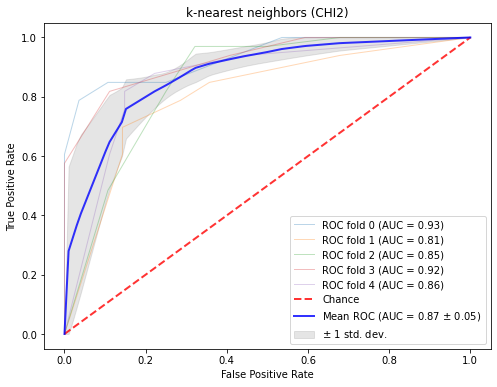

In [24]:
#KNN (CHI2)

def selecao_modelos(df,colunas,previsao,variavel):
    df_X = df[colunas]
    df_Y = df[previsao]
    
    variaveis = variavel
    seed = 7   
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25,random_state=seed) 
    
    
    #Separando o array em componentes X e Y
    X = df_X.values
    Y = df_Y.values

    
    #Normalização
    scaler = MinMaxScaler(feature_range=(0,1))
    rescaledx = scaler.fit_transform(X)
    
    #Definindo os valores para o número de folds
    num_folds = 5
    num_instances = len(rescaledx)   
    
    
    kfold = StratifiedKFold(n_splits = num_folds,random_state=seed,shuffle = True)
    inicio =time.time()
    modelo = KNeighborsClassifier()
    cv_results = cross_val_score(modelo,rescaledx,Y,cv = kfold,scoring="accuracy")
    fim = time.time()
    tempo = fim - inicio
        
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(8,6))
    for i, (train, test) in enumerate(kfold.split(rescaledx, Y)):
        modelo.fit(rescaledx[train], Y[train])
        viz = plot_roc_curve(modelo, rescaledx[test], Y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                    label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
                 title="k-nearest neighbors (CHI2)")
    ax.legend(loc="lower right")
    plt.show()
       
print("Característica de Operação do Receptor (ROC) com cross validation para o melhor modelo.")
selecao_modelos(df,colunas_chi2,"target",variavel="RFE")

<h3 style="text-align:center;font-size:200%;;">Conclusão do projeto</h3>
<div class="progress">
  <div class="progress-bar" role="progressbar" style="width: 100%;" aria-valuenow="25" aria-valuemin="0" aria-valuemax="100">100% Concluído</div>
</div>

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Voltar para o topo</a>